In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler

import acquire

## 1 - Clustering with the Iris Dataset

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1 - a Choose features other than the ones used in the lesson.


In [4]:
X = iris[['sepal_length', 'petal_width']]
X.head()

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


In [5]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
X_scaled

,sepal_length,petal_width
0,-0.900681,-1.315444
1,-1.143017,-1.315444
2,-1.385353,-1.315444
3,-1.506521,-1.315444
4,-1.021849,-1.315444
...,...,...
145,1.038005,1.448832
146,0.553333,0.922303
147,0.795669,1.053935
148,0.432165,1.448832


## 1 - b Visualize the results of your clustering.


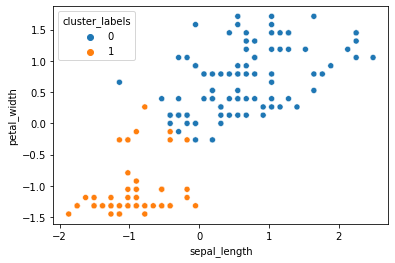

In [7]:
cluster_centers, _ = kmeans(X_scaled[['sepal_length', 'petal_width']], 2)
X_scaled['cluster_labels'], _ = vq(X_scaled[['sepal_length', 'petal_width']], cluster_centers)
# Plot clusters
sns.scatterplot(x='sepal_length', y='petal_width', hue='cluster_labels', data=X_scaled)
plt.show()


## 1 - c Use the elbow method to visually select a good value for k.


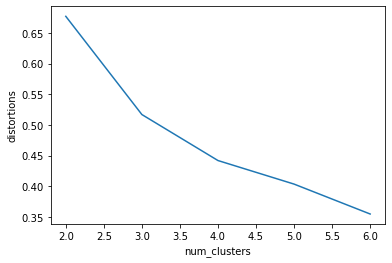

In [8]:
# Declaring variables for use
distortions = []
num_clusters = range(2, 7)
# Populating distortions for various clusters
for i in num_clusters:    
    centroids, distortion = kmeans(X_scaled[['sepal_length', 'petal_width']], i)    
    distortions.append(distortion)
    # Plotting elbow plot data
    

elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot_data)
plt.show()


## 1-d Repeat the clustering, this time with 3 different features.


In [9]:
X2 = iris[['sepal_length','sepal_width', 'petal_width']]


In [10]:
scaler = StandardScaler().fit(X2)
X_scaled2 = pd.DataFrame(scaler.transform(X2), columns= X2.columns).set_index([X2.index.values])

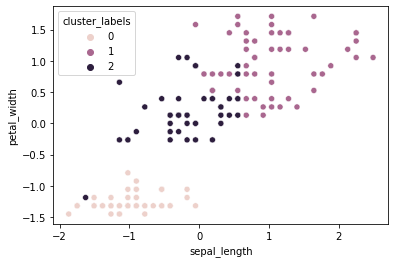

In [11]:
cluster_centers, _ = kmeans(X_scaled2[['sepal_length', 'sepal_width','petal_width']], 3)
X_scaled2['cluster_labels'], _ = vq(X_scaled2[['sepal_length', 'sepal_width','petal_width']], cluster_centers)
# Plot clusters
sns.scatterplot(x='sepal_length', y='petal_width', hue='cluster_labels', data=X_scaled2)
plt.show()


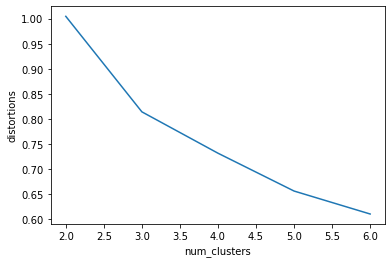

In [12]:
# Declaring variables for use
distortions = []
num_clusters = range(2, 7)
# Populating distortions for various clusters
for i in num_clusters:    
    centroids, distortion = kmeans(X_scaled2[['sepal_length', 'sepal_width','petal_width']], i)    
    distortions.append(distortion)
    # Plotting elbow plot data
    

elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot_data)
plt.show()


## 2 Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [13]:
df = acquire.get_mall_data()

In [14]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [16]:
X_mall = df[['age', 'annual_income','spending_score']]


In [17]:
scaler = StandardScaler().fit(X_mall)
X_mall_scaled = pd.DataFrame(scaler.transform(X_mall), columns= X_mall.columns).set_index([X_mall.index.values])

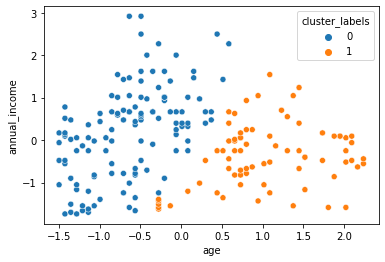

In [18]:
cluster_centers, _ = kmeans(X_mall_scaled[['age', 'annual_income']], 2)
X_mall_scaled['cluster_labels'], _ = vq(X_mall_scaled[['age', 'annual_income']], cluster_centers)
# Plot clusters
sns.scatterplot(x='age', y='annual_income', hue='cluster_labels', data=X_mall_scaled)
plt.show()


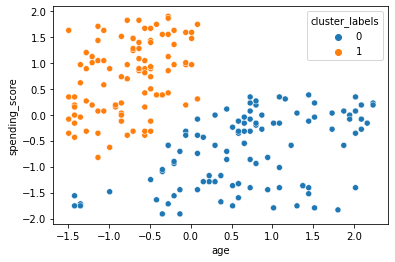

In [19]:
cluster_centers, _ = kmeans(X_mall_scaled[['age', 'spending_score']], 2)
X_mall_scaled['cluster_labels'], _ = vq(X_mall_scaled[['age', 'spending_score']], cluster_centers)
# Plot clusters
sns.scatterplot(x='age', y='spending_score', hue='cluster_labels', data=X_mall_scaled)
plt.show()


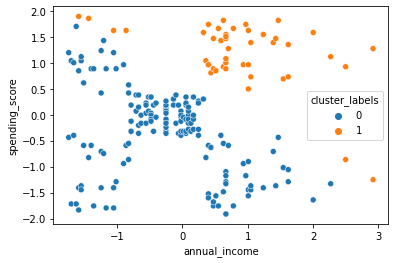

In [20]:
cluster_centers, _ = kmeans(X_mall_scaled[['annual_income', 'spending_score']], 2)
X_mall_scaled['cluster_labels'], _ = vq(X_mall_scaled[['annual_income', 'spending_score']], cluster_centers)
# Plot clusters
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_labels', data=X_mall_scaled)
plt.show()


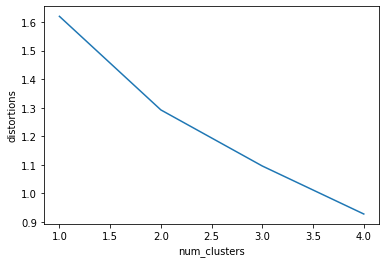

In [21]:
# Declaring variables for use
distortions = []
num_clusters = range(1, 5)
# Populating distortions for various clusters
for i in num_clusters:    
    centroids, distortion = kmeans(X_mall_scaled[['age', 'annual_income', 'spending_score']], i)    
    distortions.append(distortion)
    # Plotting elbow plot data
    

elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot_data)
plt.show()


In [22]:
df['age'] = df['age'].astype(float)
df['annual_income'] = df['annual_income'].astype(float)

df['spending_score'] = df['spending_score'].astype(float)




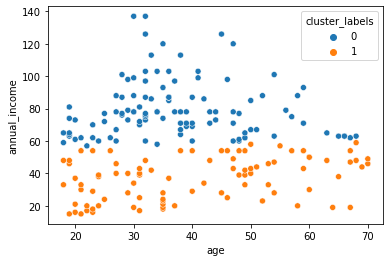

In [23]:
cluster_centers, _ = kmeans(df[['age', 'annual_income']], 2)
df['cluster_labels'], _ = vq(df[['age', 'annual_income']], cluster_centers)
# Plot clusters
sns.scatterplot(x='age', y='annual_income', hue='cluster_labels', data=df)
plt.show()


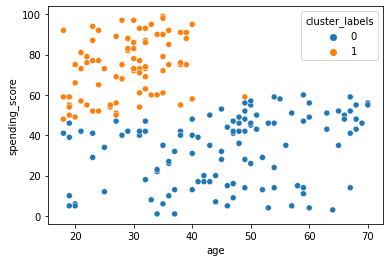

In [24]:
cluster_centers, _ = kmeans(df[['age', 'spending_score']], 2)
df['cluster_labels'], _ = vq(df[['age', 'spending_score']], cluster_centers)
# Plot clusters
sns.scatterplot(x='age', y='spending_score', hue='cluster_labels', data=df)
plt.show()

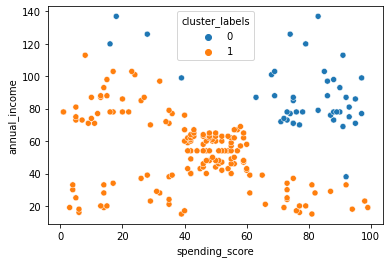

In [25]:
cluster_centers, _ = kmeans(df[['spending_score', 'annual_income']], 2)
df['cluster_labels'], _ = vq(df[['spending_score', 'annual_income']], cluster_centers)
# Plot clusters
sns.scatterplot(x='spending_score', y='annual_income', hue='cluster_labels', data=df)
plt.show()


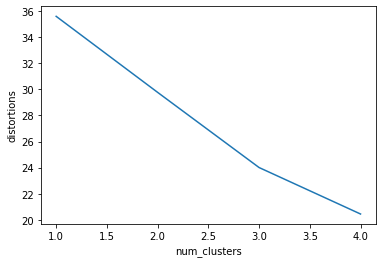

In [30]:
# Declaring variables for use
distortions = []
num_clusters = range(1, 5)
# Populating distortions for various clusters
for i in num_clusters:    
    centroids, distortion = kmeans(df[['age','annual_income','spending_score']] ,i)    
    distortions.append(distortion)
    # Plotting elbow plot data
    

elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot_data)
plt.show()
